In [1]:
"""IMPORT BIBLIOTEK"""
import mne 
import matplotlib.pyplot as plt
import numpy as np 
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs #funkcje ica
from mne_icalabel import label_components #ica-label algorytm
import onnxruntime #biblioteka do obsługi ica-label
#backend matplotliba 
%matplotlib qt 
"""WSTĘPNE USTAWIENIA PRZED WCZYTANIEM SYGNAŁU"""
d_path = "eeg_files/20241017_kp.bdf" #ścieżka do pliku
ch_eog = ["EXG1","EXG2"] #zdefiniowanie dedykowanych kanałów EOG
ch_ecg = ["EXG3","EXG4"] #zdefiniowanie dedykowanych kanałów ECG
ch_exclude = [f"EXG{i}" for i in range(5,9)] #wykluczenie kanałów niewykorzystanych w badaniu
"""ZAŁADOWANIE SYGNAŁU I USTAWIENIE UKŁADU ELEKTROD"""
raw = mne.io.read_raw_bdf(
    d_path, preload = True, eog = ch_eog, misc = ch_ecg, exclude = ch_exclude 
)
raw.set_montage("biosemi64")
notch = 50 
bandpass_low = 0.1 
bandpass_high = 40
raw.filter(bandpass_low,bandpass_high ) 
raw.notch_filter(notch)


ModuleNotFoundError: No module named 'mne_icalabel'

In [2]:
from pyprep.prep_pipeline import PrepPipeline
"""DO PYPREP""" 
montage = raw.get_montage()
raw_for_pyprep=raw.copy() #utworzenie kopi do pyprep
sample_rate = raw_for_pyprep.info["sfreq"] #pobranie informacji o częstotliwości próbkowania
montage = mne.channels.make_standard_montage("biosemi64") #ustawienie montażu
prep_params = {
    "ref_chs": "eeg", 
    "reref_chs": "eeg",
    "line_freqs": [],
}
prep = PrepPipeline(raw_for_pyprep, prep_params, montage)
prep.fit()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 6759 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 6759 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


/opt/homebrew/Cellar/jupyterlab/4.4.1_1/libexec/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████|  : 285/285 [01:44<00:00,    2.72it/s]


RANSAC done!



2025-05-30 19:04:57,822 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['POz'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('CP1'), np.str_('AFz')], 'bad_all': [np.str_('CP1'), 'POz', np.str_('AFz')]}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████|  : 285/285 [01:42<00:00,    2.79it/s]


RANSAC done!



2025-05-30 19:07:31,644 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['AFz'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Cz', 'C1'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('CP1'), np.str_('CPz')], 'bad_all': [np.str_('CP1'), 'Cz', 'C1', np.str_('CPz'), 'AFz']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 5 sensors


2025-05-30 19:07:41,749 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████|  : 285/285 [01:47<00:00,    2.66it/s]


RANSAC done!



2025-05-30 19:10:07,375 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['AFz'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Cz', 'C1'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('CP1'), np.str_('CPz'), np.str_('C1')], 'bad_all': [np.str_('CP1'), 'Cz', 'C1', np.str_('CPz'), 'AFz']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 5 sensors


2025-05-30 19:10:15,044 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████|  : 285/285 [01:45<00:00,    2.70it/s]


RANSAC done!



2025-05-30 19:12:39,332 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['AFz'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['Cz', 'C1'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('CP1'), np.str_('CPz'), np.str_('C1')], 'bad_all': [np.str_('CP1'), 'Cz', 'C1', np.str_('CPz'), 'AFz']}
2025-05-30 19:12:39,333 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 5 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 6759 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Executing RANSAC
This may take a while, so be patient...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████|  : 285/285 [01:45<00:00,    2.70it/s]


RANSAC done!
Found 2 uniquely bad channels:

0 by NaN: []

0 by flat: []

1 by deviation: ['AFz']

0 by HF noise: []

0 by correlation: []

0 by SNR: []

0 by dropout: []

1 by RANSAC: [np.str_('CP1')]



Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 62 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 6759 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Executing RANSAC
This may take a while, so be patient...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████|  : 285/285 [01:55<00:00,    2.47it/s]


RANSAC done!


In [3]:
print("Złe kanały: {}".format(prep.interpolated_channels))
print("Oryginalne złe kanały: {}".format(prep.noisy_channels_original["bad_all"]))
print("Złe kanały po interpolacji: {}".format(prep.still_noisy_channels))

Złe kanały: [np.str_('CP1'), 'AFz']
Oryginalne złe kanały: [np.str_('CP1'), 'POz', np.str_('AFz')]
Złe kanały po interpolacji: [np.str_('C1')]


In [5]:
print("Oryginalne złe kanały: {}".format(prep.noisy_channels_original))

Oryginalne złe kanały: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['POz'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('CP1'), np.str_('AFz')], 'bad_all': [np.str_('CP1'), 'POz', np.str_('AFz')]}


In [7]:
raw_full_processed_by_prep = prep.raw 


In [4]:
"""OBLCZENIE MACIERZY KORELACJI WSZYSTKICH KANAŁÓW"""
raw_for_corr = raw_full_processed_by_prep.copy()

data = raw_for_corr.copy().pick("eeg").get_data()
corr = np.corrcoef(data)
eeg_channels = raw_for_corr.ch_names
channels_to_exclude = ['EXG1', 'EXG2', 'EXG3', 'EXG4','Status']

for channel_to_remove in channels_to_exclude:
    if channel_to_remove in eeg_channels:
        eeg_channels.remove(channel_to_remove) 


mean_corr = corr.mean(axis=1)
sorted_idx = np.argsort(mean_corr)
for idx in sorted_idx:
    print(f"{eeg_channels[idx]}: średnie r = {mean_corr[idx]:.2f}")


NameError: name 'raw_full_processed_by_prep' is not defined

In [8]:
raw_full_processed_by_prep.interpolate_bads()

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors


<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

In [9]:
ica = mne.preprocessing.ICA(
    n_components=None, 
    max_iter='auto', 
    random_state=97
    )
ica.fit(raw_full_processed_by_prep)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 61 components
Fitting ICA took 94.6s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,78 iterations on raw data (2928640 samples)
ICA components,61
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


In [73]:
ica.plot_properties(raw_full_processed_by_prep,picks=[0,1,2])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x43af75990> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x167d0f510> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x102f478c0> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x43af75990> contents scale of 2 - updating layer to match.
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSViewBackingLayer: 0x43af75990> contents scale of 2 - updating layer to match.


In [28]:
from mne_icalabel import label_components
ic_labels_1 = label_components(raw_full_processed_by_prep, ica, method='iclabel')
labels_1 = ic_labels_1["labels"]

/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_86985/3277054132.py:2: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels_1 = label_components(raw_full_processed_by_prep, ica, method='iclabel')
/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_86985/3277054132.py:2: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels_1 = label_components(raw_full_processed_by_prep, ica, method='iclabel')
/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_86985/3277054132.py:2: RuntimeWarning: The provided ICA instance was fitted with a 'fasti

In [29]:
print(labels_1) 

['eye blink', 'other', 'other', 'eye blink', 'eye blink', 'eye blink', 'eye blink', 'channel noise', 'eye blink', 'channel noise', 'other', 'other', 'other', 'brain', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'brain', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other']


In [39]:
for idx,label in enumerate(labels_1):
    if label == "eye blink":
        print(f"Komponent IC00{idx} sklasyfikowano jako {label} - artefakt wzrokowy")

Komponent IC000 sklasyfikowano jako eye blink - artefakt wzrokowy
Komponent IC003 sklasyfikowano jako eye blink - artefakt wzrokowy
Komponent IC004 sklasyfikowano jako eye blink - artefakt wzrokowy
Komponent IC005 sklasyfikowano jako eye blink - artefakt wzrokowy
Komponent IC006 sklasyfikowano jako eye blink - artefakt wzrokowy
Komponent IC008 sklasyfikowano jako eye blink - artefakt wzrokowy


In [31]:
labels_1.count("other")

51

In [43]:
eog_indices, eog_scores = ica.find_bads_eog(raw_full_processed_by_prep,ch_name=ch_eog)
print(eog_indices)

[np.int64(8), np.int64(6)]


In [21]:
sources = ica.get_sources(raw_full_processed_by_prep)
cp = ica.g

In [71]:
picks = [0, 1, 2] 
figs_ica_properties = []
for pick in picks:
    fig = ica.plot_properties(raw, picks=pick, show=False)
    figs_ica_properties.append(fig)
report = mne.Report(title='Raport właściwości ICA')
for i, fig in enumerate(figs_ica_properties):
    report.add_figure(
        fig=fig,
        title=f'Właściwości komponentu ICA {picks[i]}',
        caption=f'Szczegółowe właściwości dla komponentu ICA numer {picks[i]}.',
        tags=(f'ICA-{picks[i]}', 'properties')
    )
report.save('raport_ica.html', overwrite=True, open_browser=True)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Embedding : jquery-3.6.0.min.js
Embedding : bootstrap.bundle.min.js
Embedding : bootstrap.min.css
Embedding : bootstrap-table/bootstrap-table.min.js
Embedding : bootstrap-tabl

'/Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/raport_ica.html'

(array([[ 9.66475483e-04, -5.76662398e-03, -1.24384641e-02, ...,
         -1.05859084e-03, -5.36273443e-05,  9.66475483e-04]],
       shape=(1, 2928640)),
 array([0.00000000e+00, 4.88281250e-04, 9.76562500e-04, ...,
        1.42999854e+03, 1.42999902e+03, 1.42999951e+03], shape=(2928640,)))

In [154]:
raw_after_ica = raw_full_processed_by_prep.copy()
ica.exclude = [0,1,2,3,4,5,6,8]
ica.apply(raw_after_ica,exclude=ica.exclude)


<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

In [137]:
"""UZYSKANIE WARTOŚCI PRAWDOPODOBIEŃSTW"""
from mne_icalabel.iclabel import iclabel_label_components
p_all = iclabel_label_components(raw_full_processed_by_prep, ica, inplace=False)
labels = ['brain', 'muscle artifact', 'eye blink',
       'heart beat', 'line noise', 'channel noise', 'other']


In [141]:
from mne_icalabel.iclabel import iclabel_label_components #import całej klasy iclabel 
p_all = iclabel_label_components(raw_full_processed_by_prep, ica, inplace=False) #wszystkie prawdopodobieństwa
labels = ['brain', 'muscle artifact', 'eye blink',
       'heart beat', 'line noise', 'channel noise', 'other'] #etykiety klasyfikatora
comps_to_check = [0,1,2,3,4,5,6,8] #komponenty do sprawdzenia
all_dict = {} #zbiorczy słownik prawdopodobieństw dla badanych komponentów 

for comp in comps_to_check: #pętla, która uzupełnia zbiorczy słownik kolejnymi słownikami prawdopodobieństw dla komponentów
    p_comp = p_all[comp] #prawdopodobieństwa uzyskane przez komponenty 
    p_dict = dict(zip(labels,p_comp)) #utworzenie słownika dla konkretnego komponentu               
    all_dict[comp] = p_dict #zapisanie słownika dla konkretnego komponentu w słowniku zbiorczym
for i in comps_to_check: #pętla, która wyświetla poszczególne wartości prawdopodobieństw dla wybranych komponentów
    print(f"Prawdopodobieństwa dla komponentu IC00{i}")
    for label, prob in all_dict[i].items():
        print(f"{label:18s}: {prob *100:.2f} %") 

/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_86985/755307341.py:2: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  p_all = iclabel_label_components(raw_full_processed_by_prep, ica, inplace=False)
/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_86985/755307341.py:2: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  p_all = iclabel_label_components(raw_full_processed_by_prep, ica, inplace=False)
/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_86985/755307341.py:2: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' a

Prawdopodobieństwa dla komponentu IC000
brain             : 0.79 %
muscle artifact   : 1.11 %
eye blink         : 93.61 %
heart beat        : 0.03 %
line noise        : 0.02 %
channel noise     : 1.34 %
other             : 3.10 %
Prawdopodobieństwa dla komponentu IC001
brain             : 6.77 %
muscle artifact   : 0.48 %
eye blink         : 36.43 %
heart beat        : 0.14 %
line noise        : 0.13 %
channel noise     : 0.56 %
other             : 55.49 %
Prawdopodobieństwa dla komponentu IC002
brain             : 4.15 %
muscle artifact   : 0.16 %
eye blink         : 8.24 %
heart beat        : 0.03 %
line noise        : 0.25 %
channel noise     : 0.95 %
other             : 86.23 %
Prawdopodobieństwa dla komponentu IC003
brain             : 17.03 %
muscle artifact   : 3.76 %
eye blink         : 51.88 %
heart beat        : 0.85 %
line noise        : 0.22 %
channel noise     : 2.78 %
other             : 23.48 %
Prawdopodobieństwa dla komponentu IC004
brain             : 2.56 %
muscle art

In [74]:
ratio = ica.get_explained_variance_ratio(raw_full_processed_by_prep,components=[1,2],ch_type="eeg")

In [85]:
explained_var = ratio["eeg"]
print(f"Komponenty 001 i 002 wyjaśniają {explained_var*100:.2f} % całkowitej wariancji sygnału. ") 

Komponenty 001 i 002 wyjaśniają 23.86 % całkowitej wariancji sygnału. 


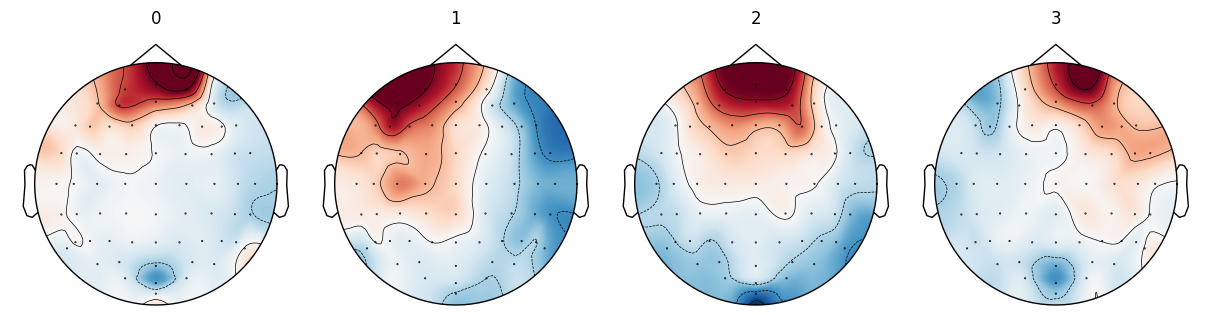

2025-05-27 16:23:21.044 Python[86985:17147430] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-27 16:23:21.044 Python[86985:17147430] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-27 16:23:21.044 Python[86985:17147430] Text input context does not respond to _valueForTIProperty:


In [156]:
from pycrostates.preprocessing import extract_gfp_peaks
from pycrostates.cluster import ModKMeans
epochs = mne.make_fixed_length_epochs(raw_for_micro,duration=4,preload=True)
gfp_data = extract_gfp_peaks(epochs, min_peak_distance=3)
ModK = ModKMeans(n_clusters=4, random_state=42)
ModK.fit(gfp_data, n_jobs=10, verbose="WARNING")
ModK.plot()

###### 

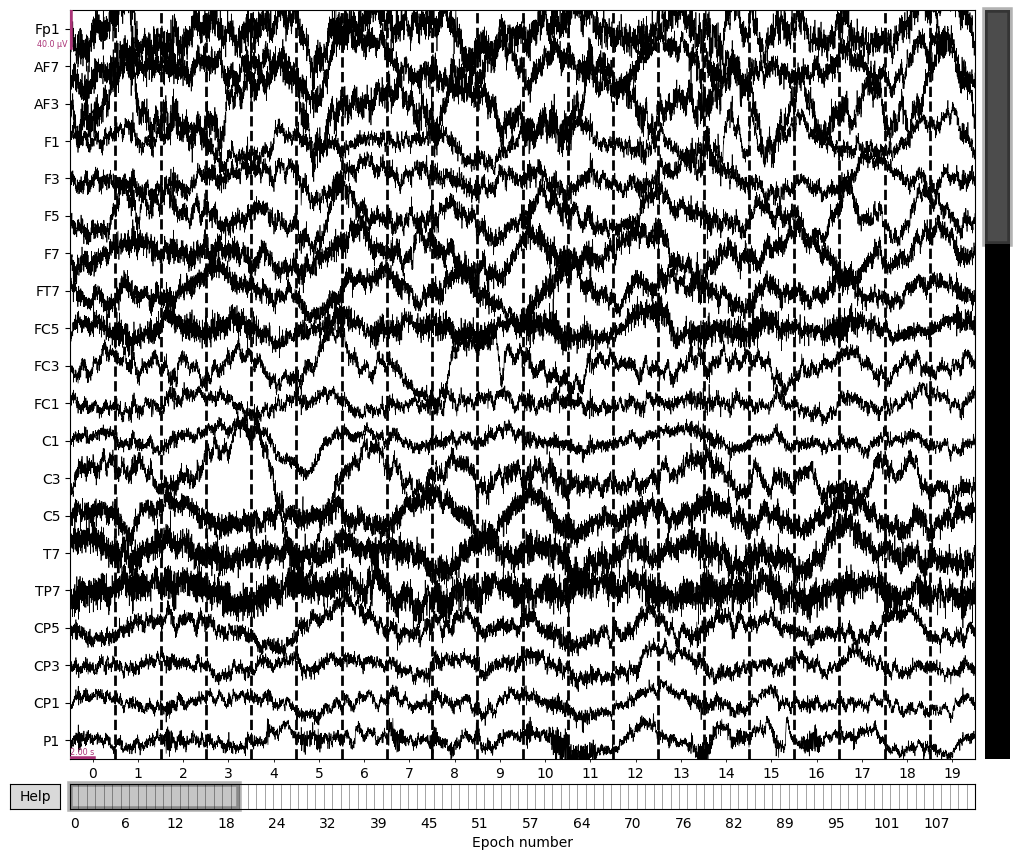

2025-05-27 16:29:29.898 Python[86985:17147430] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-27 16:29:29.898 Python[86985:17147430] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-27 16:29:29.898 Python[86985:17147430] Text input context does not respond to _valueForTIProperty:
2025-05-27 16:33:46.839 Python[86985:17147430] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-27 16:33:46.839 Python[86985:17147430] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-27 16:33:46.839 Python[86985:17147430] Text input context does not respond to _valueForTIProperty:


In [166]:
epochs.plot()

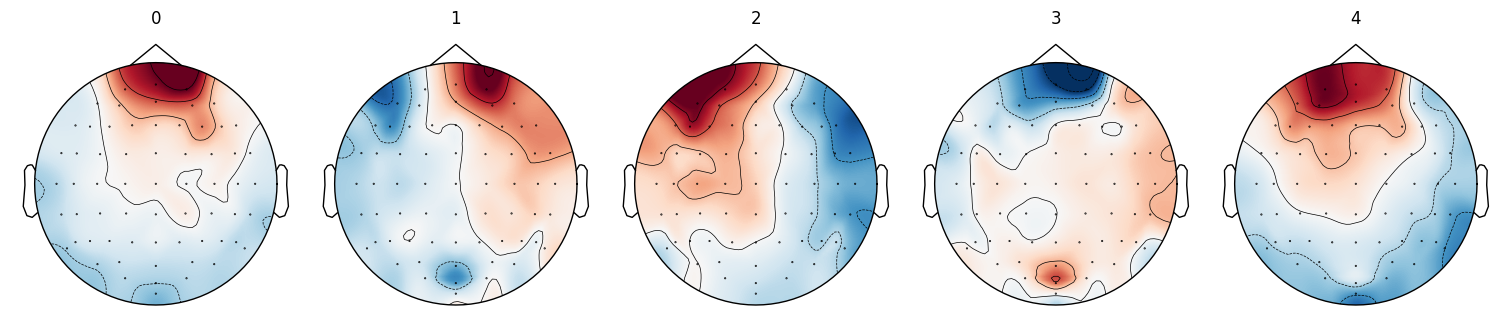

2025-05-27 16:46:37.019 Python[86985:17147430] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-27 16:46:37.019 Python[86985:17147430] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-27 16:46:37.019 Python[86985:17147430] Text input context does not respond to _valueForTIProperty:
2025-05-27 16:47:08.981 Python[86985:17147430] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-27 16:47:08.981 Python[86985:17147430] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-27 16:47:08.981 Python[86985:17147430] Text input context does not respond to _valueForTIProperty:


In [173]:
from pycrostates.preprocessing import extract_gfp_peaks
from pycrostates.cluster import ModKMeans
gfp_data = extract_gfp_peaks(epochs, min_peak_distance=2,reject_by_annotation=True)
ModK = ModKMeans(n_clusters=5, random_state=42)
ModK.fit(gfp_data, n_jobs=20, verbose="WARNING")
ModK.plot()